# Financial Market News - Sentiment Analysis

---------

## Objective 

We aim to analyze the digital text (Financial Market News) to determine and find the review / emotional tone (reaction) / feedback of the audience who read the Financial Market News since the start of January'20 till the end of March'21. The review is mentioned in the 'Labels' column, having two categorical values, that is, '1' for positive review / reaction / feedback and '0' for negative review / reaction / feedback. It is importent to predict thefeedback of the news headlines as it determines the need of the customer, and chance to shape their sales and marketing plans, improve crisis management, and also look for improvement of their product to see what works and what doesn't. We are aiming to make a Sentiment Analysis model by using three different algorithms (that is, Logistic Regression, Support Vector Machine Classifier, and Random Forest Classifier). We also compared the accuracy of each model. By creating this model for the news, they can improve customer experience, optimize their services for their customer,and increase the positivity.

## Data Source 
The dataset we used is available on Kaggle (link: 'https://github.com/YBI-Foundation/Dataset/blob/main/Financial%20Market%20News.csv').
For in-depth information about the available libraries, modules and functions, we used Pandas, Numpy,and Matplotlib official website where they have provided free information about all libraries that can be used to bring the desirable outcome for our Machine Learning Model.

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data 

In [3]:
fmn=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Financial%20Market%20News.csv',encoding="ISO-8859-1")

## Describe Data

In [4]:
fmn.head()

,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
0,01-01-2010,0,McIlroy's men catch cold from Gudjonsson,Obituary: Brian Walsh,Workplace blues leave employers in the red,Classical review: Rattle,Dance review: Merce Cunningham,Genetic tests to be used in setting premiums,Opera review: La Bohème,Pop review: Britney Spears,...,Finland 0 - 0 England,Healy a marked man,Happy birthday Harpers & Queen,Win unlimited access to the Raindance film fes...,Labour pledges £800m to bridge north-south divide,Wales: Lib-Lab pact firm despite resignation,Donald Dewar,Regenerating homes regenerates well-being in ...,Win £100 worth of underwear,TV guide: Random views
1,02-01-2010,0,Warning from history points to crash,Investors flee to dollar haven,Banks and tobacco in favour,Review: Llama Farmers,War jitters lead to sell-off,Your not-so-secret history,Review: The Northern Sinfonia,Review: Hysteria,...,Why Wenger will stick to his Gunners,Out of luck England hit rock bottom,Wilkinson out of his depth,Kinsella sparks Irish power play,Brown banished as Scots rebound,Battling Wales cling to lifeline,Ehiogu close to sealing Boro move,Man-to-man marking,Match stats,French referee at centre of storm is no strang...
2,03-01-2010,0,Comment: Why Israel's peaceniks feel betrayed,Court deals blow to seizure of drug assets,An ideal target for spooks,World steps between two sides intent on war,What the region's papers say,Comment: Fear and rage in Palestine,Poverty and resentment fuels Palestinian fury,Republican feud fear as dissident is killed,...,FTSE goes upwardly mobile,At this price? BP Amoco,Go fish,Bosnian Serb blows himself up to evade law,Orange float delayed to 2001,"Angry factory workers root out fear, favours a...",Smith defied advice on dome payout,Xerox takes the axe to jobs,Comment: Refugees in Britain,Maverick who sparked the new intifada
3,04-01-2010,1,"£750,000-a-goal Weah aims parting shot",Newcastle pay for Fletcher years,Brown sent to the stands for Scotland qualifier,Tourists wary of breaking new ground,Canary Wharf climbs into the FTSE 100,Review: Bill Bailey,Review: Classical,Review: New Contemporaries 2000,...,More cash on way for counties,Cairns carries Kiwis to victory,Year of Blanchflower's flourish when Spurs sto...,New direct approach brings only pay-per-blues,Third Division round-up,Second Division round-up,First Division round-up,McLean ends his career with a punch,Heskey grabs triple crown,Weah on his way as City march on
4,05-01-2010,1,Leeds arrive in Turkey to the silence of the fans,One woman's vision offers loan lifeline,Working Lives: How world leaders worked,Working Lives: Tricks of the trade,"Working Lives: six-hour days, long lunches and...",Pop review: We Love UK,World music review: Marisa Monte,Art review: Hollingsworth/Heyer,...,Duisenberg in double trouble,Pru to cut pension charges,Art review: Paul Graham,Shearer shot sparks Boro humiliation,Ridsdale's lingering fears as Leeds revisit Tu...,Champions League: Rangers v Galatasaray,Champions League: Lazio v Arsenal,Lazio 1 - 1 Arsenal,England in Pakistan,England given olive-branch reception


In [9]:
fmn.tail(10)

,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
4091,15-03-2021,1,A staggering 87 percent of Venezuelans say the...,Two corporate whistleblowers may enter into pl...,"Poland, together with Russia, Iran, and severa...",Three environmental activists were killed per ...,"Ontario funeral business dissolves the dead, p...",New Declassified Documents Reveal How CIA Abus...,Tens of thousands of people gathered in swelte...,Japan's dementia crisis hits record levels as ...,...,"Three dead, 45 injured as labor union clashes ...",Indonesia vows to stand firm after skirmishes ...,A study of ocean plankton has shown that an in...,Australia taxes foreign home buyers as afforda...,Paris isn't happy about Amazon's one-hour deli...,Australian man pleads guilty to making sexual ...,Trudeau condemns killing of 14 Canadian Embass...,Vladimir Putin is considering selling part of ...,An elephant has survived being shot in the hea...,Wikileaks founder Julian Assange marks 5 years...
4092,16-03-2021,1,An Australian athlete who has competed in six ...,Russian state television accidentally broadcas...,"In 2015, 50 environmentalists were killed in B...",China's plan to cut meat consumption by 50% ch...,Coral bleaching event now biggest in history ...,Super-rich quaff champagne in Venezuela countr...,Hong Kong bookseller refuses to be silenced af...,Chinese prosecutors have successfully sued a c...,...,Turkey charges Reporters Without Borders press...,Brussels: Bomb alert at shopping centre sparks...,Australian Paralympian Liesl Tesch robbed at g...,China issues orders to demolish Buddhist 'town...,Gazans squeezed by triple taxes as Hamas repla...,US and Russian fighters in dramatic showdown o...,Rising Tide of 'Politically Acceptable' Killin...,Mexico teachers protest: Six people are dead a...,Canada is set to launch a paid whistleblower p...,Russian football fan leader Alexander Shprygin...
4093,17-03-2021,0,German government agrees to ban fracking indef...,Teenage recruits were raped by staff and force...,Pakistan is selling nuclear materials to N Kor...,Amazon jaguar shot dead at Olympic torch ceremony,Mexican flags raised around Donald Trump's gol...,EU smashes 2020 emissions target six years ear...,Police kill eight striking Mexican teachers as...,Pro-choice activists have delivered abortion p...,...,Turkish students and graduates from 370 school...,"Japan Election Campaign Kicks off, Voting Age ...",Moscow has signed an agreement with Los Angele...,TEPCO admits meltdown cover-up - The president...,Indian State Grants Jews Minority Status - Ind...,Canadian Rescue Plane successfully reaches Sou...,The Swedish parliament on Tuesday voted in fav...,French police teargas migrants trying to board...,Qawwali musician Amjad Sabri was shot dead in ...,N. Korea launches what appears to be Musudan m...
4094,18-03-2021,1,Today The United Kingdom decides whether to re...,"E-cigarettes should not be banned in public, m...",Report: China is still harvesting organs from ...,"Man opens fire at cinema complex in Germany, s...","Erdoan: Europe, you dont want us because were ...",Asian millionaires now control more wealth tha...,A Japanese porn industry association has apolo...,University students are being warned when clas...,...,"Colombia, FARC announce full ceasefire, 'last ...",Gunmen kill Sufi devotional singer Amjad Sabri...,India launches 20 satellites in single mission,F-16s to be manufactured soon in an assembly l...,Australia's gun laws stopped mass shootings an...,French cement company in Syria buys oil from I...,Pope to visit Armenia after irking Turkey with...,Merkel says NATO must be strengthened,"China cracks down on online comments, click-ba...",The prime minister of India is set to get a br...
4095,19-03-2021,0,David Cameron to Resign as PM After EU Referendum,BBC forecasts UK votes to Leave the European U...,Nicola Sturgeon says a second independ

In [5]:
fmn.describe()

,Label
count,4101.000000
mean,0.528164
std,0.499267
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
fmn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4101 non-null   object
 1   Label    4101 non-null   int64 
 2   News 1   4101 non-null   object
 3   News 2   4101 non-null   object
 4   News 3   4101 non-null   object
 5   News 4   4101 non-null   object
 6   News 5   4101 non-null   object
 7   News 6   4101 non-null   object
 8   News 7   4101 non-null   object
 9   News 8   4101 non-null   object
 10  News 9   4101 non-null   object
 11  News 10  4101 non-null   object
 12  News 11  4101 non-null   object
 13  News 12  4101 non-null   object
 14  News 13  4101 non-null   object
 15  News 14  4101 non-null   object
 16  News 15  4101 non-null   object
 17  News 16  4101 non-null   object
 18  News 17  4101 non-null   object
 19  News 18  4101 non-null   object
 20  News 19  4101 non-null   object
 21  News 20  4101 non-null   object
 22  

In [7]:
fmn.shape

(4101, 27)

In [8]:
fmn.columns

Index(['Date', 'Label', 'News 1', 'News 2', 'News 3', 'News 4', 'News 5',
       'News 6', 'News 7', 'News 8', 'News 9', 'News 10', 'News 11', 'News 12',
       'News 13', 'News 14', 'News 15', 'News 16', 'News 17', 'News 18',
       'News 19', 'News 20', 'News 21', 'News 22', 'News 23', 'News 24',
       'News 25'],
      dtype='object')

## Data Visualization

Text(0.5, 1.0, 'Count Plot for labels')

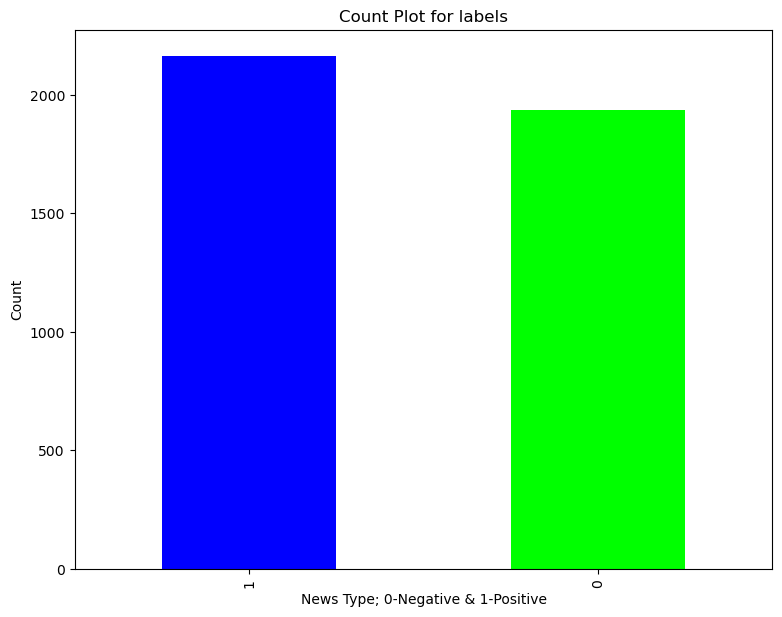

In [14]:
# Count plot for labels feature
plt.figure(figsize=(9,7))
fmn.Label.value_counts().plot(kind='bar',color=['blue','lime','red'])
plt.xlabel("News Type; 0-Negative & 1-Positive")
plt.ylabel("Count")
plt.title("Count Plot for labels")

## Data Preprocessing 

### Get Feature Selection

In [15]:
' '.join(str(x) for x in fmn.iloc[1,2:27])

"Warning from history points to crash Investors flee to dollar haven Banks and tobacco in favour Review: Llama Farmers War jitters lead to sell-off Your not-so-secret history Review: The Northern Sinfonia Review: Hysteria Review: The Guardsman Opera: The Marriage of Figaro Review: The Turk in Italy Deutsche spells out its plans for diversification Traders' panic sends oil prices skyward TV sport chief leaves home over romance Leader: Hi-tech twitch Why Wenger will stick to his Gunners Out of luck England hit rock bottom Wilkinson out of his depth Kinsella sparks Irish power play Brown banished as Scots rebound Battling Wales cling to lifeline Ehiogu close to sealing Boro move Man-to-man marking Match stats French referee at centre of storm is no stranger to controversy"

In [16]:
fmn.index

RangeIndex(start=0, stop=4101, step=1)

In [17]:
len(fmn.index)

4101

In [18]:
#Headlines of the new
news=[]
for rows in range(0,len(fmn.index)):
    news.append(' '.join(str(x) for x in fmn.iloc[rows,2:27]))

In [19]:
type(news)

list

In [20]:
news[0]

"McIlroy's men catch cold from Gudjonsson Obituary: Brian Walsh Workplace blues leave employers in the red Classical review: Rattle Dance review: Merce Cunningham Genetic tests to be used in setting premiums Opera review: La Bohème Pop review: Britney Spears Theatre review: The Circle Wales face a fraught night Under-21  round-up Smith off to blot his copybook Finns taking the mickey Praise wasted as Brown studies injury options Ireland wary of minnows Finland 0 - 0 England Healy a marked man Happy birthday Harpers & Queen Win unlimited access to the Raindance film festival Labour pledges £800m to bridge north-south divide Wales: Lib-Lab pact firm despite resignation Donald Dewar Regenerating homes  regenerates well-being in people Win £100 worth of underwear TV guide: Random views"

In [21]:
x=news

In [22]:
type(x)

list

### Get Feature text conversion to Bag of words 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv=CountVectorizer(lowercase= True,ngram_range=(1,1))

## Define Target variable (x) and Feature variable (y) 

In [25]:
X=cv.fit_transform(x)

In [26]:
X.shape

(4101, 48527)

In [27]:
y=fmn['Label']

In [28]:
y.shape

(4101,)

## Train Test Split 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=2529)

## Modeling 

### Model Selection 

#### 1. Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()

#### 2. Support Vector Machine

In [33]:
from sklearn.svm import SVC
model2= SVC()

#### 3. Random Forest Classification Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)

### Training the model

#### 1. Logistic Regression

In [32]:
model1.fit(x_train,y_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 2. Support Vector Machine 

In [35]:
model2.fit(x_train,y_train)

SVC()

#### 3. Random Forest 

In [41]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

## Prediction 

#### 1. Logistic Regresion

In [36]:
y_lr_pred=model1.predict(x_test)

#### 2. Support Vector Machine 

In [37]:
y_svm_pred=model2.predict(x_test)

#### 3. Random Forest

In [42]:
y_rf_pred=rfc.predict(x_test)

## Model Evaluation
Accuracy

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#### 1. Logistic Regression 

In [45]:
confusion_matrix(y_test,y_lr_pred)

array([[213, 271],
       [254, 288]], dtype=int64)

In [46]:
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45       484
           1       0.52      0.53      0.52       542

    accuracy                           0.49      1026
   macro avg       0.49      0.49      0.49      1026
weighted avg       0.49      0.49      0.49      1026



In [48]:
print("The accuracy of the model created (Logistic Regression)= ",100*accuracy_score(y_test,y_lr_pred))

The accuracy of the model created (Logistic Regression)=  48.83040935672515


#### 2. Support Vector Machine 

In [49]:
confusion_matrix(y_test,y_svm_pred)

array([[ 74, 410],
       [110, 432]], dtype=int64)

In [50]:
print(classification_report(y_test,y_svm_pred))

              precision    recall  f1-score   support

           0       0.40      0.15      0.22       484
           1       0.51      0.80      0.62       542

    accuracy                           0.49      1026
   macro avg       0.46      0.47      0.42      1026
weighted avg       0.46      0.49      0.43      1026



In [52]:
print("The accuracy of the model created (Support Vector Machine)=",100*accuracy_score(y_test,y_svm_pred))

The accuracy of the model created (Support Vector Machine)= 49.317738791423


#### 3. Random Forest

In [54]:
confusion_matrix(y_test,y_rf_pred)

array([[114, 370],
       [136, 406]], dtype=int64)

In [55]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.46      0.24      0.31       484
           1       0.52      0.75      0.62       542

    accuracy                           0.51      1026
   macro avg       0.49      0.49      0.46      1026
weighted avg       0.49      0.51      0.47      1026



In [56]:
print("The accuracy of the model created (Random Forest)=",100*accuracy_score(y_test,y_rf_pred))

The accuracy of the model created (Random Forest)= 50.682261208576996
